#### This notebook evaluates a mixure of leave-one-out and individual model

In [1]:
import init_paths
import numpy as np
import pandas as pd
import seaborn as sns
import sys
import cortico_cereb_connectivity.globals as gl
import cortico_cereb_connectivity.run_model as rm
from cortico_cereb_connectivity.scripts.script_train_eval_models import *
import Functional_Fusion.dataset as fdata
import glob
import matplotlib.pyplot as plt

In [2]:
for p in np.linspace(0,100,11):
    eval_models(train_dataset="MDTB", train_ses="ses-s1",
                eval_dataset=['MDTB'], eval_ses="ses-s2",
                eval_id='mix-all-scale', model='mix', ext_list=[8], mix_param=p, append=True)

- getting weights for sub-02
- getting weights for sub-03
- getting weights for sub-04
- getting weights for sub-06
- getting weights for sub-08
- getting weights for sub-09
- getting weights for sub-10
- getting weights for sub-12
- getting weights for sub-14
- getting weights for sub-15
- getting weights for sub-17
- getting weights for sub-18
- getting weights for sub-19
- getting weights for sub-20
- getting weights for sub-21
- getting weights for sub-22
- getting weights for sub-24
- getting weights for sub-25
- getting weights for sub-26
- getting weights for sub-27
- getting weights for sub-28
- getting weights for sub-29
- getting weights for sub-30
- getting weights for sub-31
portion_value = 0.0
- Evaluate sub-02
- Evaluate sub-03
- Evaluate sub-04
- Evaluate sub-06
- Evaluate sub-08
- Evaluate sub-09
- Evaluate sub-10
- Evaluate sub-12
- Evaluate sub-14
- Evaluate sub-15
- Evaluate sub-17
- Evaluate sub-18
- Evaluate sub-19
- Evaluate sub-20
- Evaluate sub-21
- Evaluate sub

In [2]:
df_mix=rm.comb_eval(models=['mix-all-scale'], eval_data=['MDTBs2'])
df_mix['model_type'] = 'mix'

df2=rm.comb_eval(models=['MDs1-ind-scale','MDs1-avg-scale','MDs1-loo-scale'],eval_data=['MDTBs2'])
df2['model_type'] = df2['model']
df2.loc[df2['model'].isna() & (df2.subj_id != df2.eval_subj),'model_type']='diff'
df2.loc[df2['model'].isna() & (df2.subj_id == df2.eval_subj),'model_type']='same'

(0.3, 0.44)

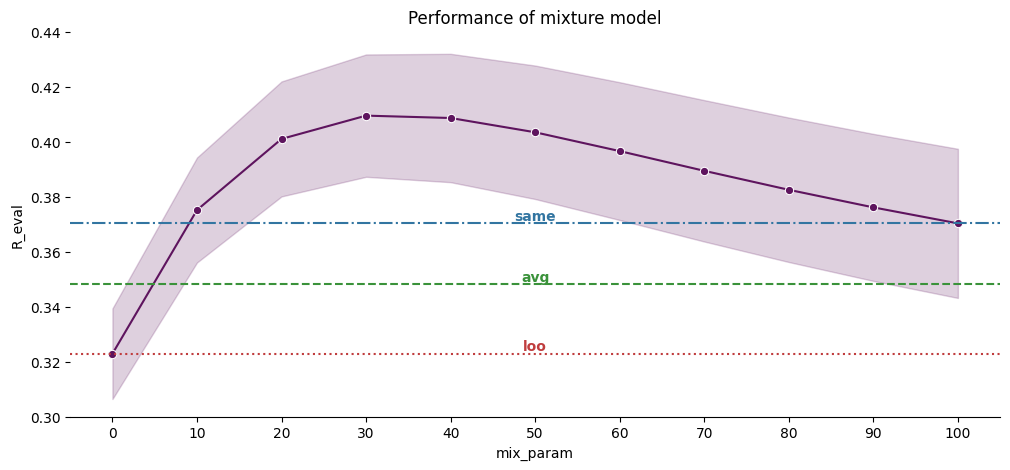

In [3]:
colors = ["#5e145e", "#3275a1", "#3a923a", "#c03d3e"]

# plotting the mixed model performance
plt.figure(figsize=(12,5))
ax = sns.lineplot(data=df_mix,x='mix_param',y='R_eval',errorbar='se',marker='o',color=colors[0])

# plotting the horizontal lines for comparison
plt.axhline(y=df2[df2['model_type']=='same']['R_eval'].mean(), color=colors[1], linestyle='-.', label='same')
plt.axhline(y=df2[df2['model_type']=='avg']['R_eval'].mean(), color=colors[2], linestyle='--', label='avg')
plt.axhline(y=df2[df2['model_type']=='loo']['R_eval'].mean(), color=colors[3], linestyle=':', label='loo')

# # decoration
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.set_xticks(np.linspace(0,100,11))
ax.text(x=50,y=df2[df2['model_type']=='same']['R_eval'].mean(),s='same',color=colors[1],fontweight='bold',horizontalalignment='center',verticalalignment='bottom')
ax.text(x=50,y=df2[df2['model_type']=='avg']['R_eval'].mean(),s='avg',color=colors[2],fontweight='bold',horizontalalignment='center',verticalalignment='bottom')
ax.text(x=50,y=df2[df2['model_type']=='loo']['R_eval'].mean(),s='loo',color=colors[3],fontweight='bold',horizontalalignment='center',verticalalignment='bottom')
plt.title('Performance of mixture model')
plt.ylim([0.3, 0.44])

The script below selects a subset of n subjects from top of the subject list to calculate the loo model.
Evaluation will be on all subjects for comparison.

In [5]:
# mix loo and ind models and evaluate on all subjects
subj_num = [5, 8, 14, 20]
for n in subj_num:
    for p in np.linspace(0,100,11):
        eval_models(train_dataset="MDTB", train_ses="ses-s1",
                    eval_dataset=['MDTB'], eval_ses="ses-s2",
                    eval_id='mix-%d'%n, model='mix', ext_list=[8], mix_param=p, model_subj_list=n, append=True)

- getting weights for sub-02
- getting weights for sub-03
- getting weights for sub-04
- getting weights for sub-06
- getting weights for sub-08
- getting weights for sub-09
- getting weights for sub-10
- getting weights for sub-12
- getting weights for sub-14
- getting weights for sub-15
- getting weights for sub-17
- getting weights for sub-18
- getting weights for sub-19
- getting weights for sub-20
- getting weights for sub-21
- getting weights for sub-22
- getting weights for sub-24
- getting weights for sub-25
- getting weights for sub-26
- getting weights for sub-27
- getting weights for sub-28
- getting weights for sub-29
- getting weights for sub-30
- getting weights for sub-31
portion_value = 0.0
- Evaluate sub-02
- Evaluate sub-03
- Evaluate sub-04
- Evaluate sub-06
- Evaluate sub-08
- Evaluate sub-09
- Evaluate sub-10
- Evaluate sub-12
- Evaluate sub-14
- Evaluate sub-15
- Evaluate sub-17
- Evaluate sub-18
- Evaluate sub-19
- Evaluate sub-20
- Evaluate sub-21
- Evaluate sub

/cifs/diedrichsen/data/Cerebellum/connectivity/SUIT3/cortico_cereb_connectivity/model.py:100: RuntimeWarning: divide by zero encountered in divide
  Xs = X / self.scale_


- Evaluate sub-10
- Evaluate sub-12
- Evaluate sub-14
- Evaluate sub-15
- Evaluate sub-17
- Evaluate sub-18
- Evaluate sub-19
- Evaluate sub-20
- Evaluate sub-21
- Evaluate sub-22


/cifs/diedrichsen/data/Cerebellum/connectivity/SUIT3/cortico_cereb_connectivity/model.py:100: RuntimeWarning: divide by zero encountered in divide
  Xs = X / self.scale_


- Evaluate sub-24
- Evaluate sub-25
- Evaluate sub-26
- Evaluate sub-27
- Evaluate sub-28
- Evaluate sub-29
- Evaluate sub-30
- Evaluate sub-31
- getting weights for sub-02
- getting weights for sub-03
- getting weights for sub-04
- getting weights for sub-06
- getting weights for sub-08
- getting weights for sub-09
- getting weights for sub-10
- getting weights for sub-12
- getting weights for sub-14
- getting weights for sub-15
- getting weights for sub-17
- getting weights for sub-18
- getting weights for sub-19
- getting weights for sub-20
- getting weights for sub-21
- getting weights for sub-22
- getting weights for sub-24
- getting weights for sub-25
- getting weights for sub-26
- getting weights for sub-27
- getting weights for sub-28
- getting weights for sub-29
- getting weights for sub-30
- getting weights for sub-31
portion_value = 0.0
- Evaluate sub-02
- Evaluate sub-03
- Evaluate sub-04
- Evaluate sub-06
- Evaluate sub-08
- Evaluate sub-09
- Evaluate sub-10
- Evaluate sub

/cifs/diedrichsen/data/Cerebellum/connectivity/SUIT3/cortico_cereb_connectivity/model.py:100: RuntimeWarning: divide by zero encountered in divide
  Xs = X / self.scale_


- Evaluate sub-10
- Evaluate sub-12
- Evaluate sub-14
- Evaluate sub-15
- Evaluate sub-17
- Evaluate sub-18
- Evaluate sub-19
- Evaluate sub-20
- Evaluate sub-21
- Evaluate sub-22


/cifs/diedrichsen/data/Cerebellum/connectivity/SUIT3/cortico_cereb_connectivity/model.py:100: RuntimeWarning: divide by zero encountered in divide
  Xs = X / self.scale_


- Evaluate sub-24
- Evaluate sub-25
- Evaluate sub-26
- Evaluate sub-27
- Evaluate sub-28
- Evaluate sub-29
- Evaluate sub-30
- Evaluate sub-31
- getting weights for sub-02
- getting weights for sub-03
- getting weights for sub-04
- getting weights for sub-06
- getting weights for sub-08
- getting weights for sub-09
- getting weights for sub-10
- getting weights for sub-12
- getting weights for sub-14
- getting weights for sub-15
- getting weights for sub-17
- getting weights for sub-18
- getting weights for sub-19
- getting weights for sub-20
- getting weights for sub-21
- getting weights for sub-22
- getting weights for sub-24
- getting weights for sub-25
- getting weights for sub-26
- getting weights for sub-27
- getting weights for sub-28
- getting weights for sub-29
- getting weights for sub-30
- getting weights for sub-31
portion_value = 0.0
- Evaluate sub-02
- Evaluate sub-03
- Evaluate sub-04
- Evaluate sub-06
- Evaluate sub-08
- Evaluate sub-09
- Evaluate sub-10
- Evaluate sub

/cifs/diedrichsen/data/Cerebellum/connectivity/SUIT3/cortico_cereb_connectivity/model.py:100: RuntimeWarning: divide by zero encountered in divide
  Xs = X / self.scale_


- Evaluate sub-10
- Evaluate sub-12
- Evaluate sub-14
- Evaluate sub-15
- Evaluate sub-17
- Evaluate sub-18
- Evaluate sub-19
- Evaluate sub-20
- Evaluate sub-21
- Evaluate sub-22


/cifs/diedrichsen/data/Cerebellum/connectivity/SUIT3/cortico_cereb_connectivity/model.py:100: RuntimeWarning: divide by zero encountered in divide
  Xs = X / self.scale_


- Evaluate sub-24
- Evaluate sub-25
- Evaluate sub-26
- Evaluate sub-27
- Evaluate sub-28
- Evaluate sub-29
- Evaluate sub-30
- Evaluate sub-31


In [5]:
df_mix=rm.comb_eval(models=['mix-5'], eval_data=['MDTBs2'])
df_mix['subject_num'] = 5
df_temp=rm.comb_eval(models=['mix-8'], eval_data=['MDTBs2'])
df_temp['subject_num'] = 8
df_mix = pd.concat([df_mix, df_temp],ignore_index=True)
df_temp=rm.comb_eval(models=['mix-14'], eval_data=['MDTBs2'])
df_temp['subject_num'] = 14
df_mix = pd.concat([df_mix, df_temp],ignore_index=True)
df_temp=rm.comb_eval(models=['mix-20'], eval_data=['MDTBs2'])
df_temp['subject_num'] = 20
df_mix = pd.concat([df_mix, df_temp],ignore_index=True)
df_temp=rm.comb_eval(models=['mix-all'], eval_data=['MDTBs2'])
df_temp['subject_num'] = 'all'
df_mix = pd.concat([df_mix, df_temp],ignore_index=True)


df2=rm.comb_eval(models=['MDs1-ind','MDs1-avg','MDs1-loo'],eval_data=['MDTBs2'])
df2['model_type'] = df2['model']
df2.loc[df2['model'].isna() & (df2.subj_id != df2.eval_subj),'model_type']='diff'
df2.loc[df2['model'].isna() & (df2.subj_id == df2.eval_subj),'model_type']='same'

Text(0.5, 1.0, 'Performance of mixture model')

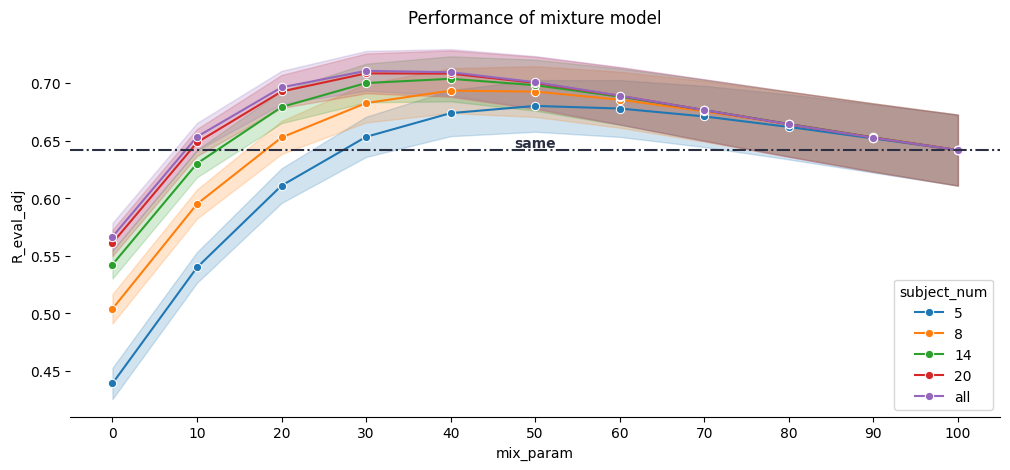

In [6]:
colors = ["#EF233C", "#2B2F42", "gray", "#8E99AD"]

# plotting the mixed model performance
plt.figure(figsize=(12,5))
ax = sns.lineplot(data=df_mix,x='mix_param',y='R_eval_adj',hue='subject_num',errorbar='se',marker='o',color=colors[0])

# plotting the horizontal lines for comparison
plt.axhline(y=df2[df2['model_type']=='same']['R_eval_adj'].mean(), color=colors[1], linestyle='-.', label='same')
# plt.axhline(y=df2[df2['model_type']=='avg']['R_eval'].mean(), color=colors[2], linestyle='--', label='avg')
# plt.axhline(y=df2[df2['model_type']=='loo']['R_eval'].mean(), color=colors[3], linestyle=':', label='loo')

# # decoration
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.set_xticks(np.linspace(0,100,11))
ax.text(x=50,y=df2[df2['model_type']=='same']['R_eval_adj'].mean(),s='same',color=colors[1],fontweight='bold',horizontalalignment='center',verticalalignment='bottom')
# ax.text(x=50,y=df2[df2['model_type']=='avg']['R_eval'].mean(),s='avg',color=colors[2],fontweight='bold',horizontalalignment='center',verticalalignment='bottom')
# ax.text(x=50,y=df2[df2['model_type']=='loo']['R_eval'].mean(),s='loo',color=colors[3],fontweight='bold',horizontalalignment='center',verticalalignment='bottom')
plt.title('Performance of mixture model') 